# Read in train File, and initial data analysis


In [1]:
#First, import all necessary libraries for data cleaning
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

color = sns.color_palette()
%matplotlib inline

In [2]:
#second, load in training data first
train_df = pd.read_csv('train_2016_v2.csv',header=0,parse_dates = ['transactiondate'])
train_df.info()
train_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90275 entries, 0 to 90274
Data columns (total 3 columns):
parcelid           90275 non-null int64
logerror           90275 non-null float64
transactiondate    90275 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.1 MB


,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [3]:
#third, apply some value counts analysis to understand the data
(train_df['parcelid'].value_counts().reset_index())['parcelid'].value_counts()

1    90026
2      123
3        1
Name: parcelid, dtype: int64

In [4]:
train_df['transaction_month'] = train_df['transactiondate'].dt.month
month_analysis = train_df['transaction_month'].value_counts().sort_index()
month_analysis

1      6556
2      6333
3      8652
4      9311
5      9961
6     10922
7      9947
8     10476
9      9575
10     4977
11     1826
12     1739
Name: transaction_month, dtype: int64

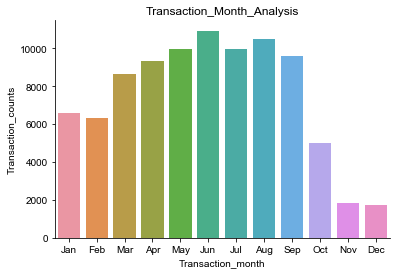

In [5]:
ax = sns.barplot(month_analysis.index,month_analysis.values)
plt.xlabel('Transaction_month')
plt.ylabel('Transaction_counts')
plt.title('Transaction_Month_Analysis')
label = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(label)
# Set style to whitegrid
sns.set_style('whitegrid')
# Remove unwanted borders
sns.despine()

plt.show()

/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


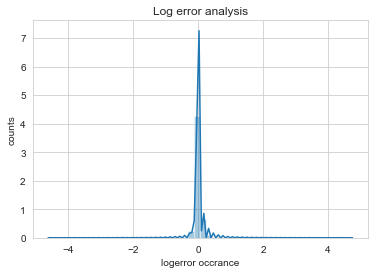

In [6]:
# 4, apply some value counts analysis to understand logerror
ax = sns.distplot(train_df['logerror'])
plt.xlabel('logerror occrance')
plt.ylabel('counts')
plt.title('Log error analysis')
plt.show()


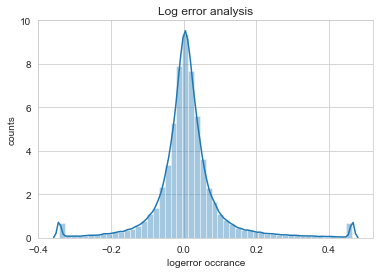

In [7]:
#get rid of outliers to plot it again
ulimit = np.percentile(train_df.logerror, 99)
llimit = np.percentile(train_df.logerror, 1)
log_errors = train_df['logerror'].clip(lower=llimit, upper=ulimit)

ax = sns.distplot(log_errors)
plt.xlabel('logerror occrance')
plt.ylabel('counts')
plt.title('Log error analysis')
plt.show()

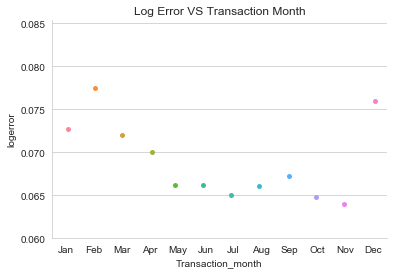

In [8]:
mean = abs(train_df['logerror']).groupby(train_df['transaction_month']).mean()
ax = sns.stripplot(mean.index,mean.values)
plt.xlabel('Transaction_month')
plt.ylabel('logerror')
plt.title('Log Error VS Transaction Month')
label = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(label)
# Set style to whitegrid
sns.set_style('whitegrid')
# Remove unwanted borders
sns.despine()

plt.show()

# Read in Property File, and initial data analysis

In [9]:
property_df = pd.read_csv('properties_2016.csv',parse_dates = ['yearbuilt'])
property_df.head(5)


/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [10]:
merged_df = train_df.merge(property_df, on = 'parcelid', how = 'left')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 61 columns):
parcelid                        90275 non-null int64
logerror                        90275 non-null float64
transactiondate                 90275 non-null datetime64[ns]
transaction_month               90275 non-null int64
airconditioningtypeid           28781 non-null float64
architecturalstyletypeid        261 non-null float64
basementsqft                    43 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingclasstypeid             16 non-null float64
buildingqualitytypeid           57364 non-null float64
calculatedbathnbr               89093 non-null float64
decktypeid                      658 non-null float64
finishedfloor1squarefeet        6856 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
finishedsquarefeet12            85596 non-null float64
finishedsquarefeet1

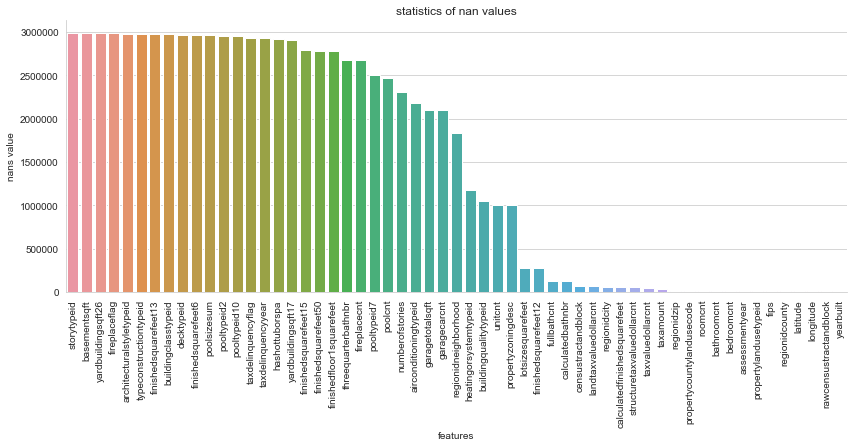

In [11]:
#bar plot of NAN value portion in features
plt.figure(figsize=(14, 5))
nans = property_df.drop('parcelid', axis=1).isnull().sum().sort_values(ascending=False)
ax = sns.barplot(nans.index,nans.values)
plt.xticks(rotation=90)
plt.xlabel('features')
plt.ylabel('nans value')
plt.title('statistics of nan values')
sns.set_style('whitegrid')
sns.despine()
plt.show()

In [12]:
#missing value percentage count
#miss_col_98 = pd.DataFrame(((property_df.isnull().sum())/len(property_df['storytypeid'])).reset_index(), columns = ['feature','percentage'])
#miss_col_98.head(5)
miss_col_96 = pd.DataFrame(((property_df.isnull().sum())/len(property_df['storytypeid'])).sort_values(ascending=False).reset_index())
miss_col_96 = miss_col_96.rename(columns={'index':'features',0:'percentage'})
miss_col_96[miss_col_96['percentage']>0.96]


,features,percentage
0,storytypeid,0.999456
1,basementsqft,0.999455
2,yardbuildingsqft26,0.999113
3,fireplaceflag,0.998270
4,architecturalstyletypeid,0.997970
5,typeconstructiontypeid,0.997740
6,finishedsquarefeet13,0.997430
7,buildingclasstypeid,0.995769
8,decktypeid,0.994273
9,finishedsquarefeet6,0.992630


In [13]:
#next step find out all numerical columns, and plot heatmaps for numerical columns
merged_df.dtypes.value_counts()

float64           52
object             6
int64              2
datetime64[ns]     1
dtype: int64

In [14]:
#seperate numerical columns as a lsit
type_object = []
type_num = []
type_date = []
for i in merged_df.columns:
    if merged_df[i].dtypes == 'object':
        type_object.append(i)
    elif merged_df[i].dtypes == 'datetime64[ns]':
        type_date.append(i)
    else:
        type_num.append(i)
len(type_num)      
        

54

In [15]:
#first remove object data, and date data
merged_num_df = merged_df.drop(type_object,axis = 1).drop(type_date,axis=1)


/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


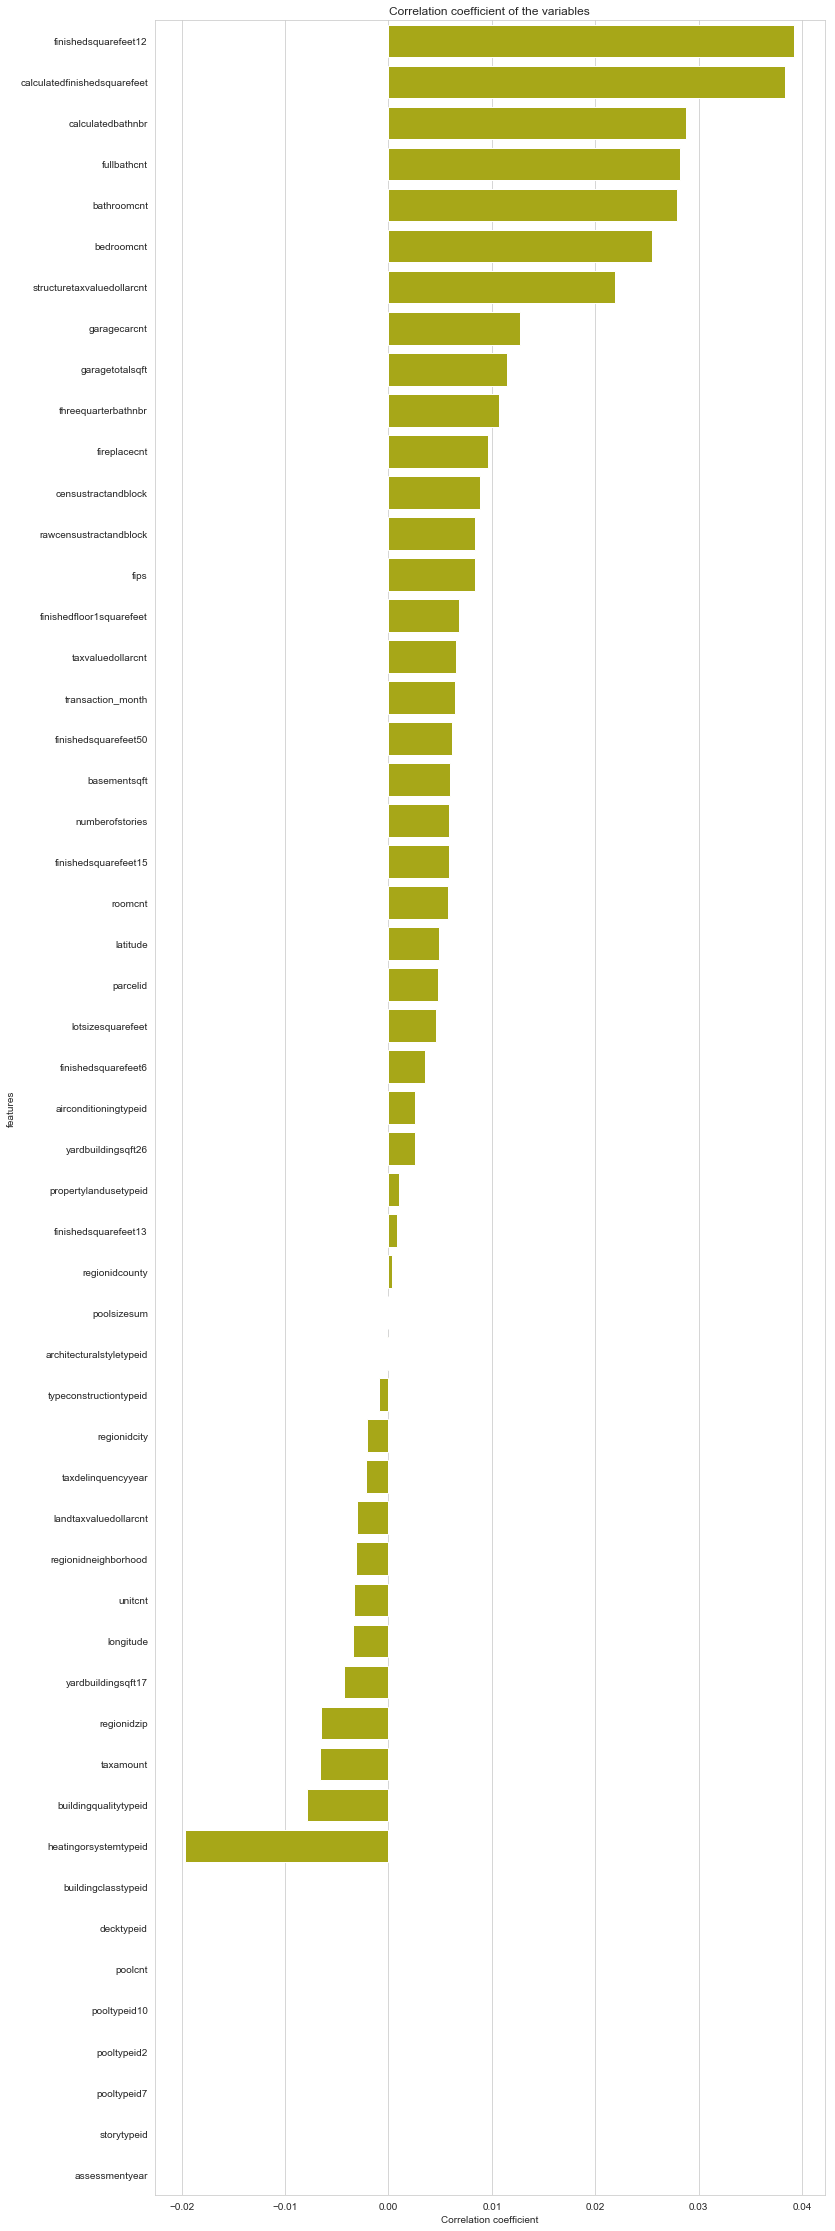

In [16]:
# Let us just impute the missing values with mean values to compute correlation coefficients #
#first calculate correlation between logerror and numerical columns
mean_values = merged_num_df.mean(axis=0)
merged_num_df.fillna(mean_values, inplace=True)

labels = []
values = []
for col in merged_num_df.columns:
    labels.append(col)
    values.append(np.corrcoef(merged_num_df[col].values, merged_num_df.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values', ascending =False).reset_index()
corr_df.iloc[1:,:]

plt.figure(figsize=(12, 40))
ax = sns.barplot(np.array(corr_df.iloc[1:,:].corr_values), np.array(corr_df.iloc[1:,:].col_labels),color='y')
ax.set_yticklabels(corr_df.iloc[1:,:].col_labels)
plt.xlabel("Correlation coefficient")
plt.ylabel('features')
plt.title("Correlation coefficient of the variables")
plt.show()

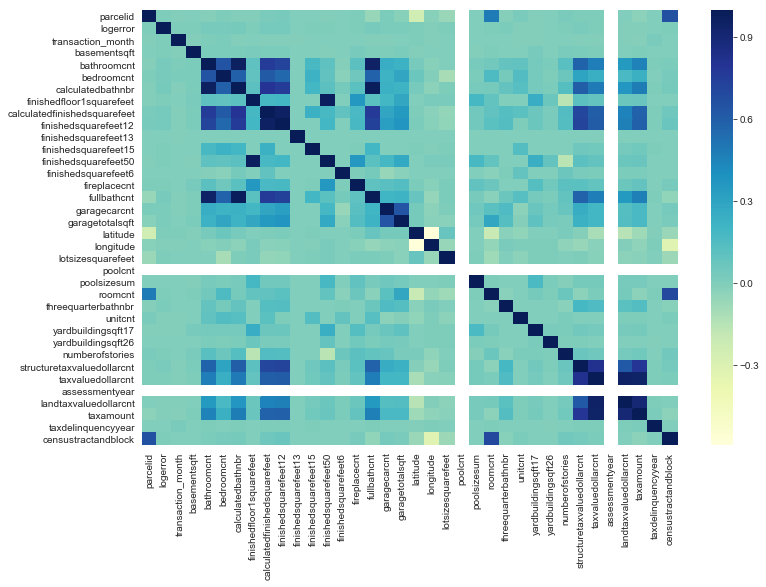

<Figure size 432x288 with 0 Axes>

In [17]:
#Identify numerical columns to produce a heatmap
catcols = ['airconditioningtypeid','architecturalstyletypeid','buildingqualitytypeid','buildingclasstypeid','decktypeid','fips','heatingorsystemtypeid','pooltypeid10','pooltypeid2','pooltypeid7','propertycountylandusecode','propertylandusetypeid','propertyzoningdesc','rawcensustractandblock','regionidcity','regionidcounty','regionidneighborhood','regionidzip','storytypeid','typeconstructiontypeid','yearbuilt','taxdelinquencyflag']
numcols = [x for x in merged_num_df.columns if x not in catcols]

#Lets start by plotting a heatmap to determine if any variables are correlated
plt.figure(figsize = (12,8))
sns.heatmap(data=merged_num_df[numcols].corr(),cmap="YlGnBu")
plt.show()
plt.gcf().clear()

# Fill in missing data

Let's start by removing some 'potentially' redundant variables

The following are all very strongly correlated as can be seen by the dark blue path in the heatmap: (1)sqft related features: 'calculatedfinishedsquarefeet' 'finishedsquarefeet12' 
(2)bathroom related features: 'bathroomcnt','calculatedbathnbr'
(3) tax related: 'taxvaluedollarcnt', 'taxamount', 'landtaxaluedollarcnt'

In [18]:
#first have a quick look at the values of these related features from heatmap
sqft_feature = ['calculatedfinishedsquarefeet','finishedsquarefeet12']
bathroom_feature = ['bathroomcnt','calculatedbathnbr','threequarterbathnbr', 'fullbathcnt']
#these bathroom numbers are all related, we can try to just keep bathroomcnt, and keep both bathroomcnt and fullbathcnt. 
merged_df[bathroom_feature]

,bathroomcnt,calculatedbathnbr,threequarterbathnbr,fullbathcnt
0,2.0,2.0,NaN,2.0
1,3.5,3.5,1.0,3.0
2,3.0,3.0,NaN,3.0
3,2.0,2.0,NaN,2.0
4,2.5,2.5,1.0,2.0
5,4.0,4.0,NaN,4.0
6,1.0,1.0,NaN,1.0
7,2.5,2.5,1.0,2.0
8,1.0,1.0,NaN,1.0
9,2.0,2.0,NaN,2.0


In [19]:
#afater inspection, drop redundant columns:
merged_num_df.drop(['finishedsquarefeet12','calculatedbathnbr'],axis=1, inplace = True)
#also drop decktypeid columns, missing 80000 values

In [20]:
merged_num_df.drop('decktypeid',axis=1, inplace = True)
merged_num_df.columns

Index(['parcelid', 'logerror', 'transaction_month', 'airconditioningtypeid',
       'architecturalstyletypeid', 'basementsqft', 'bathroomcnt', 'bedroomcnt',
       'buildingclasstypeid', 'buildingqualitytypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'heatingorsystemtypeid', 'latitude',
       'longitude', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum',
       'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'propertylandusetypeid',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidneighborhood', 'regionidzip', 'roomcnt', 'storytypeid',
       'threequarterbathnbr', 'typeconstructiontypeid', 'unitcnt',
       'yardbuildingsqft17', 'yardbuildingsqft26', 'numberofstories',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear

In [21]:
#there are other area related columns contains 98 percent missing values, and are removed
area_list=['finishedsquarefeet6','finishedsquarefeet15','finishedsquarefeet13', 'finishedsquarefeet50']   

In [22]:
#raw censusblock and censusblock are very similar, only one feature need to be kept.
merged_num_df[['rawcensustractandblock','censustractandblock']].describe

<bound method NDFrame.describe of        rawcensustractandblock  censustractandblock
0                6.037107e+07         6.037107e+13
1                6.059052e+07         6.049151e+13
2                6.037464e+07         6.037464e+13
3                6.037296e+07         6.037296e+13
4                6.059042e+07         6.059042e+13
5                6.037621e+07         6.037621e+13
6                6.037542e+07         6.037542e+13
7                6.111003e+07         6.111003e+13
8                6.059042e+07         6.059042e+13
9                6.059063e+07         6.059063e+13
10               6.037141e+07         6.037141e+13
11               6.037263e+07         6.037263e+13
12               6.037311e+07         6.037311e+13
13               6.059063e+07         6.059063e+13
14               6.059002e+07         6.059002e+13
15               6.059099e+07         6.059099e+13
16               6.111007e+07         6.111007e+13
17               6.037575e+07         6.037575e+

In [23]:
#fill missing values for three object columns
index = merged_df['hashottuborspa'].isnull()
merged_df.loc[index,'hashottuborspa'] = 'None'
index = merged_df['taxdelinquencyflag'].isnull()
merged_df.loc[index,'taxdelinquencyflag'] = 'None'


In [24]:
#drop pooltypeid10,pooltypeid2,pooltype7, also fill missing poolcnt as 0.
poolid_list = ['pooltypeid10','pooltypeid2','pooltypeid7','poolsizesum']
index = merged_df['poolcnt'].isnull()
merged_df.loc[index,'poolcnt'] = 0

In [25]:
#fireplace related features, fireplace count, and fireplaceflag. Fireplaceflag has more missing values. 
index = merged_df['fireplacecnt'].isnull()
merged_df.loc[index,'fireplacecnt'] = 0



In [26]:
#fill missing values for basementsqft, and storytypeid
#index = merged_df[(merged_df['basementsqft']!=None) &(merged_df['storytypeid'] != None)]
index = merged_df[~(merged_df['basementsqft'].notnull()) & (merged_df['storytypeid'].notnull())].index
index
merged_df.loc[index,['basementsqft','storytypeid']] = 0


/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


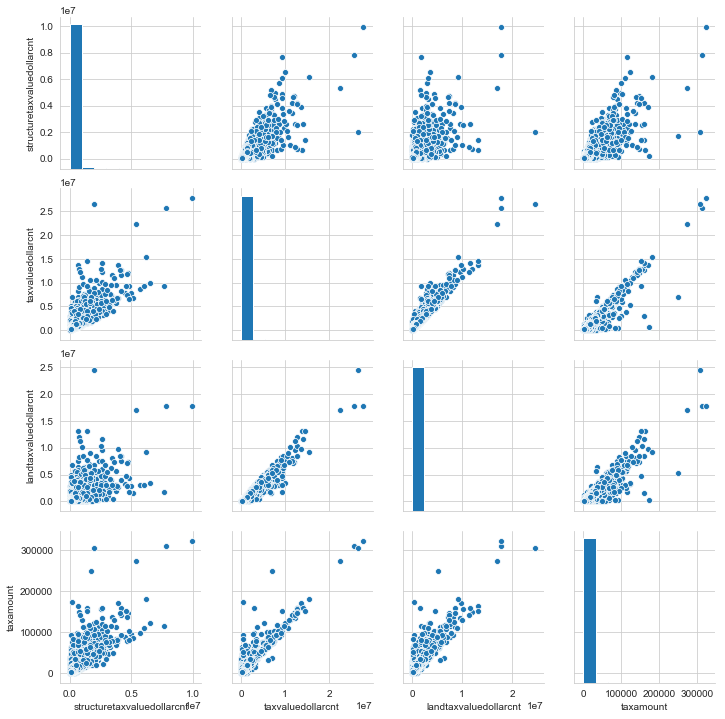

In [27]:
#pair plot tax-related features
tax_col = ['structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount']    
sns.pairplot(merged_df[tax_col])
plt.show()
#it seems taxvaluedollarcnt, landtaxvaluedollarcnt, and taxamount are linearly correlated, may consider other two values are redundant. 

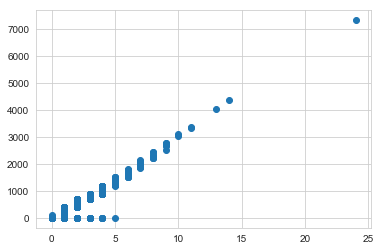

In [28]:
plt.scatter(x='garagecarcnt', y='garagetotalsqft',data = merged_df)                   
plt.show()


# After boxplot inspection, following variables will be filled with median value, because of outliers influence.
garagecarcnt (use mean or median, 60000 missing), unitcnt(use median, 30000 missing), 
calculatedbathnbr (fill with median, fill 2000 missing), calculatedfinishedsquare (fill with mean or median, 400 missing values)

numberofstories (use mean, 70000 missing, but I do not think it is suitable to fill), finishedfloorlsquarefoot(missing 80000 values, can not fill, because too many)

In [29]:
merged_df['garagecarcnt_median']=merged_df['garagecarcnt'].fillna(merged_df['garagecarcnt'].median())

merged_df['unitcnt_median'] = merged_df['unitcnt'].fillna(merged_df['unitcnt'].median())

merged_df['calculatedbathnbr_median'] = merged_df['calculatedbathnbr'].fillna(merged_df['calculatedbathnbr'].median())

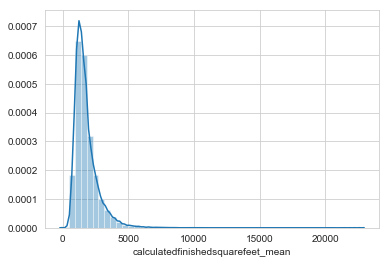

In [30]:

merged_df['calculatedfinishedsquarefeet_mean'] = merged_df['calculatedfinishedsquarefeet'].fillna(merged_df['calculatedfinishedsquarefeet'].mean())

sns.distplot(merged_df['calculatedfinishedsquarefeet_mean'])


# Use KNN cluster to predict missing values for geological location related variables

There's quite a few variables which are probably dependant on longtitude and latitude data Lets try fill in some of the missing variables using geographically nearby properties (by using the longtitude and latitude information) 

propertyzoningdesc(30000 missing), lotsizesquarefeet(missing 10000), buildingqualitytype(missing 30000), 'regionidcity', 'regionidneighborhood', 'regionidzip'

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn import neighbors
!pip install category_encoders
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import category_encoders as ce

In [32]:

def fillna_ce_knn( merged_df, base, target, n_neighbors = 5 ):
    miss = merged_df[target].isnull()
    X = pd.DataFrame(merged_df[merged_df[target].notnull()][target], columns = [target])
    Y = pd.DataFrame(merged_df[merged_df[target].notnull()].logerror,columns = ['logerror'])
    
    # Target with default parameters
    ce_target = ce.TargetEncoder(cols = [target],smoothing=5)
    ce_target.fit(X, Y)
    df=ce_target.transform(X.reset_index(drop=True), Y)
    df.set_index(X.index, inplace = True)
    
    X_base = pd.DataFrame(merged_df[merged_df[target].notnull()][base])
    
    concat_miss= pd.concat([X_base,df[target]],axis=1)
    concat_miss_X = concat_miss[base]
    concat_miss_Y = concat_miss[target]
    
    
    clf = neighbors.KNeighborsRegressor( n_neighbors )
    clf.fit( concat_miss_X, concat_miss_Y )
    
    print( 'predicting' )
    Z = clf.predict(merged_df.loc[miss, base])
    
    merged_df.loc[~miss,'regionidcity_ce'] = concat_miss_Y
    merged_df.loc[miss,'regionidcity_ce'] = Z
    
fillna_ce_knn( merged_df, base= ['latitude','longitude'], target= 'regionidcity', n_neighbors= 5)
print(merged_df[['regionidcity','regionidcity_ce']])


predicting
       regionidcity  regionidcity_ce
0           12447.0         0.009328
1           32380.0         0.002871
2           47019.0         0.009485
3           12447.0         0.009328
4           17686.0        -0.007841
5           29712.0        -0.014729
6           24174.0         0.012272
7           13150.0         0.018835
8           25459.0         0.007740
9           46098.0        -0.022558
10          12447.0         0.009328
11          12447.0         0.009328
12         396054.0         0.007233
13          52650.0         0.015104
14          17150.0         0.003727
15          25218.0         0.008121
16          53655.0         0.018133
17          46298.0         0.007896
18          34780.0         0.006275
19          12447.0         0.009328
20          46298.0         0.007896
21          47568.0         0.028883
22          24832.0         0.011714
23          12447.0         0.009328
24          24832.0         0.011714
25           5465.0        

In [33]:
def fillna_knn( df, base, target, fraction = 1, threshold = 10, n_neighbors = 5 ):
    assert isinstance( base , list ) or isinstance( base , np.ndarray ) and isinstance( target, str ) 
    whole = [ target ] + base
    
    miss = df[target].isnull()
    notmiss = ~miss 
    nummiss = miss.sum()
    
    enc = OneHotEncoder()
    X_target = df.loc[ notmiss, whole ].sample( frac = fraction )
    
    enc.fit( X_target[ target ].unique().reshape( (-1,1) ) )
    
    Y = enc.transform( X_target[ target ].values.reshape((-1,1)) ).toarray()
    X = X_target[ base  ]
    
    print( 'fitting' )
    n_neighbors = n_neighbors
    clf = neighbors.KNeighborsClassifier( n_neighbors, weights = 'uniform' )
    clf.fit( X, Y )
    
    print( 'the shape of active features: ' ,enc.active_features_.shape )
    
    print( 'predicting' )
    Z = clf.predict(df.loc[miss, base])
    
    numunperdicted = Z[:,0].sum()
    if numunperdicted / nummiss *100 < threshold :
        print( 'writing result to df' )    
        df.loc[ miss, target ]  = np.dot( Z , enc.active_features_ )
        print( 'num of unperdictable data: ', numunperdicted )
        return enc
    else:
        print( 'out of threshold: {}% > {}%'.format( numunperdicted / nummiss *100 , threshold ) )

#function to deal with variables that are actually string/categories
def zoningcode2int( df, target ):
    storenull = df[ target ].isnull()
    enc = LabelEncoder( )
    df[ target ] = df[ target ].astype( str )

    print('fit and transform')
    df[ target ]= enc.fit_transform( df[ target ].values )
    print( 'num of categories: ', enc.classes_.shape  )
    df.loc[ storenull, target ] = np.nan
    print('recover the nan value')
    return enc

In [34]:
fillna_knn( df = merged_df,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'regionidcity', fraction = 1, n_neighbors = 5 )
print(merged_df[['regionidcity','regionidcity_ce']])

/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


fitting
the shape of active features:  (177,)
predicting
writing result to df
num of unperdictable data:  2.0
       regionidcity  regionidcity_ce
0           12447.0         0.009328
1           32380.0         0.002871
2           47019.0         0.009485
3           12447.0         0.009328
4           17686.0        -0.007841
5           29712.0        -0.014729
6           24174.0         0.012272
7           13150.0         0.018835
8           25459.0         0.007740
9           46098.0        -0.022558
10          12447.0         0.009328
11          12447.0         0.009328
12         396054.0         0.007233
13          52650.0         0.015104
14          17150.0         0.003727
15          25218.0         0.008121
16          53655.0         0.018133
17          46298.0         0.007896
18          34780.0         0.006275
19          12447.0         0.009328
20          46298.0         0.007896
21          47568.0         0.028883
22          24832.0         0.011714
23

/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function active_features_ is deprecated; The ``active_features_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function active_features_ is deprecated; The ``active_features_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)


(0.008, 50000)

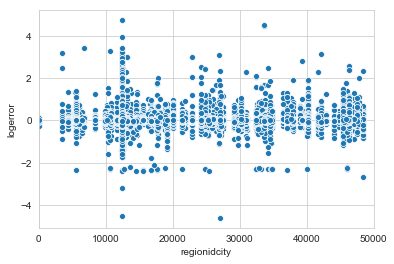

In [35]:
sns.scatterplot(x = 'regionidcity', y = 'logerror', data = merged_df)
plt.xlim([0.008,50000])

(0.008, 0.045)

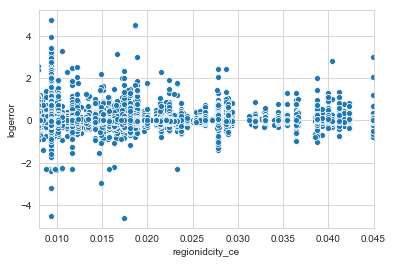

In [36]:
sns.scatterplot(x = 'regionidcity_ce', y = 'logerror', data = merged_df)
plt.xlim([0.008,0.045])

In [47]:
zoningcode2int( df = df_train,
                            target = 'propertyzoningdesc' )

fillna_knn( df = df_train,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'propertyzoningdesc', fraction = 1, n_neighbors = 5 )

#regionidcity, regionidneighborhood & regionidzip - assume it is the same as the nereast property. 
#As mentioned above, this is ok if there's a property very nearby to the one with missing values (I leave it up to the reader to check if this is the case!)
fillna_knn( df = df_train,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'regionidcity', fraction = 1, n_neighbors = 5 )

fillna_knn( df = df_train,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'regionidneighborhood', fraction = 1, n_neighbors = 5 )

fillna_knn( df = df_train,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'regionidzip', fraction = 1, n_neighbors = 5 )

/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function active_features_ is deprecated; The ``active_features_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)


fitting
the shape of active features:  (8,)
predicting
writing result to df
num of unperdictable data:  1169.0


/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function active_features_ is deprecated; The ``active_features_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)


OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [51]:
merged_df['regionidneighborhood'].value_counts()

118208.0    773
27080.0     755
48570.0     753
37739.0     715
48200.0     653
268496.0    631
51906.0     609
54300.0     540
113455.0    529
33183.0     497
274049.0    479
34213.0     477
46736.0     454
47880.0     450
47950.0     428
31817.0     417
113910.0    409
6952.0      408
274514.0    403
40548.0     397
118920.0    391
41131.0     371
268588.0    370
26134.0     352
276476.0    352
21056.0     341
41466.0     334
19810.0     332
32059.0     308
27987.0     299
           ... 
761090.0      1
761000.0      1
416311.0      1
220669.0      1
260382.0      1
416332.0      1
416335.0      1
275287.0      1
273615.0      1
763079.0      1
273350.0      1
764136.0      1
764138.0      1
762963.0      1
764139.0      1
273866.0      1
273607.0      1
762960.0      1
764140.0      1
762955.0      1
762929.0      1
273313.0      1
762949.0      1
762947.0      1
763791.0      1
763217.0      1
762937.0      1
268446.0      1
762932.0      1
762927.0      1
Name: regionidneighborho

# Use KNN cluster to predict missing values for yearofbuilt
  architechturaltype, airconditioningype, heatingtypeid

# visually check logerror relationship with variables, then get rid of outliers